# Librerias

In [74]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm
import mpmath as mp

# Solución análitica

In [250]:
# Se crea una función para el potencial que se encontró de forma analítica

def fV(x, y):
    mp.dps = 10  # Establece la precisión en 10 decimales
    N = 1000
    Vo = mp.mpf('5.0')  # # Condicion de frontera
    L = mp.mpf('10.0')  # largo del cuadrado
    
    V = mp.mpf('0.0')  # Potencial inicial antes de sumar
    
    for i in range(0, N):
        Cn = (4.0 * Vo) / ((2 * i + 1) * mp.pi * mp.sinh((2 * i + 1) * mp.pi))
        sin_term = mp.sin((2 * i + 1) * mp.pi * x / L)
        sinh_term = mp.sinh((2 * i + 1) * mp.pi * y / L)
        
        V += Cn * sin_term * sinh_term
        
    return V

# Solución por diferencias finitas

In [364]:
Min, Max, N = 0,10,101 # va desde 0 a 10 cm en pasos con una malla de 101 puntos (pasos de 0.1 cm)
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

print(h)

0.1


In [365]:
def h1(y):
    return 5 #V
def h2(y):
    return 0 #V
def h3(x):
    return 0 #V
def h4(x):
    return 0 #V

In [366]:
def InitV():
    
    V = np.zeros((N,N))
    
    V[0,:] = h1(y)
    V[-1,:] = h2(y)
    
    V[:,0] = h3(x)
    V[:,-1] = h4(x)
    
    return V

In [367]:
V = InitV()
print(V)

[[0. 5. 5. ... 5. 5. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [368]:
#Definimos la evolución de la función de evolución de la condicion inicial

def V_Evolution(V, Nit = int(1e5), tolerancia = 0.01):
    
    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                Vc = (V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])/4 #Vecinos cercanos
                Vd = (V[i+1,j+1]+V[i+1,j-1]+V[i-1,j+1]+V[i-1,j-1])/4 #Vecinos diagonales
                
                r = 0.67 * Vc + 0.33 * Vd - V[i, j]
                
                V[i,j] = 0.67 * Vc + 0.33 * Vd # Evolucion con pesos

                if np.abs(r) > dmax:
                    dmax = r
        
        if np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break
            
    return V,itmax

#Este codigo fue desarrollado en su mayoria en el curso de metodos computacionales 2.

In [369]:
V_evo = V_Evolution(V)

  0%|                                                                           | 115/100000 [00:08<2:06:29, 13.16it/s]

115


In [370]:
V_evo[0]

array([[0.00000000e+00, 5.00000000e+00, 5.00000000e+00, ...,
        5.00000000e+00, 5.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.25917046e+00, 3.46692574e+00, ...,
        3.46814365e+00, 2.25982391e+00, 0.00000000e+00],
       [0.00000000e+00, 1.37418204e+00, 2.40456659e+00, ...,
        2.40696411e+00, 1.37546819e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.72563449e-12, 7.67748516e-12, ...,
        2.26857004e-11, 1.17136523e-11, 0.00000000e+00],
       [0.00000000e+00, 1.79566425e-12, 3.70074312e-12, ...,
        1.09882572e-11, 5.67414012e-12, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [371]:
V_df = V_evo[0][::-1] #Potencial por difrencias finitas desde (0,0) -> (10,10)

print(V_df)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.79566425e-12 3.70074312e-12 ... 1.09882572e-11
  5.67414012e-12 0.00000000e+00]
 [0.00000000e+00 3.72563449e-12 7.67748516e-12 ... 2.26857004e-11
  1.17136523e-11 0.00000000e+00]
 ...
 [0.00000000e+00 1.37418204e+00 2.40456659e+00 ... 2.40696411e+00
  1.37546819e+00 0.00000000e+00]
 [0.00000000e+00 2.25917046e+00 3.46692574e+00 ... 3.46814365e+00
  2.25982391e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e+00 5.00000000e+00 ... 5.00000000e+00
  5.00000000e+00 0.00000000e+00]]


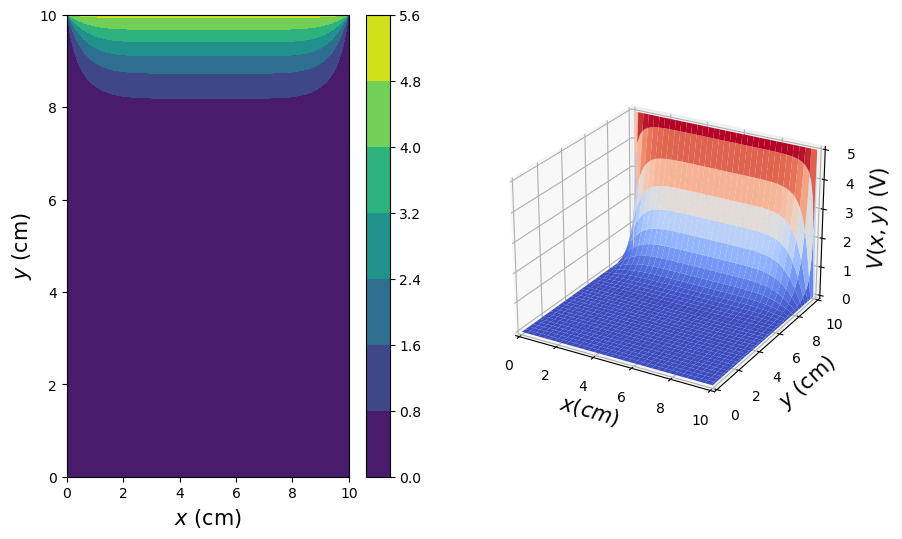

In [372]:
#Se procede a graficar el potencial sobre la placa:

# Crear la figura y los subplots
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2, projection='3d', elev=25, azim=300)

# Crear las mallas X, Y
X, Y = np.meshgrid(x, y)

# Plotear el contorno en el primer subplot
c = ax.contourf(X, Y, V_df)
ax.set_xlabel(r'$x$ (cm)', fontsize=15)
ax.set_ylabel(r'$y$ (cm)', fontsize=15)
fig.colorbar(c, ax=ax)

# Configurar el subplot en 3D
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.set_xlabel(r'$x (cm)$', fontsize=15)
ax1.set_ylabel(r'$y$ (cm)', fontsize=15)
ax1.set_zlabel(r'$V(x,y)$ (V)', fontsize=15)

# Plotear la superficie en 3D en el segundo subplot
ax1.plot_surface(X, Y, V_df, cmap=cm.coolwarm)

# Mostrar el gráfico
plt.show()


In [373]:
#Ejemplo de uso de V mediate diferencias finitas
x = 0.1 #cm
y = 9.9 #cm

j = int(y*10)
i = int(x*10)

V_df[j][i] #V

print(f"Para x = {x} cm e y = {y} cm se tiente que el V por diferencias finitas es: {round(V_df[j][i],1)}")

Para x = 0.1 cm e y = 9.9 cm se tiente que el V por diferencias finitas es: 2.3


In [374]:
#Ejemplo de uso de V mediate la solución análitica

x = 0.1 #cm
y = 9.9 #cm

print(f"Para x = {x} cm e y = {y} cm se tiente que el V análitico es: {round(fV(x,y),1)}")

Para x = 0.1 cm e y = 9.9 cm se tiente que el V análitico es: 2.5


In [375]:
#Calculo del delta para algunos puntos:

#Para x = 0 cm e y = 0 cm

x = 0 #cm
y = 0 #cm

j = int(y*10)
i = int(x*10)

delta = round( abs( round(V_df[j][i],1) - round(fV(x,y),1) ) ,1)

print(" ")
print(f"Para x = {x} cm e y = {y} cm se tiente que ΔV es: {delta}")
print(" ")

#Para x = 1 cm e y = 1 cm

x = 1 #cm
y = 1 #cm

j = int(y*10)
i = int(x*10)

delta = round( abs( round(V_df[j][i],1) - round(fV(x,y),1) ) ,1)

print(" ")
print(f"Para x = {x} cm e y = {y} cm se tiente que ΔV es: {delta}")
print(" ")

#Para x = 3 cm e y = 3 cm

x = 3 #cm
y = 3 #cm

j = int(y*10)
i = int(x*10)

delta = round( abs( round(V_df[j][i],1) - round(fV(x,y),1) ) ,1)

print(" ")
print(f"Para x = {x} cm e y = {y} cm se tiente que ΔV es: {delta}")
print(" ")

#Para x = 5 cm e y = 5 cm

x = 5 #cm
y = 5 #cm

j = int(y*10)
i = int(x*10)

delta = round( abs( round(V_df[j][i],1) - round(fV(x,y),1) ) ,1)

print(" ")
print(f"Para x = {x} cm e y = {y} cm se tiente que ΔV es: {delta}")
print(" ")

#Para x = 7 cm e y = 7 cm

x = 7 #cm
y = 7 #cm

j = int(y*10)
i = int(x*10)

delta = round( abs( round(V_df[j][i],1) - round(fV(x,y),1) ) ,1)

print(" ")
print(f"Para x = {x} cm e y = {y} cm se tiente que ΔV es: {delta}")
print(" ")

#Para x = 9 cm e y = 9 cm

x = 9 #cm
y = 9 #cm

j = int(y*10)
i = int(x*10)

delta = round( abs( round(V_df[j][i],1) - round(fV(x,y),1) ) ,1)

print(" ")
print(f"Para x = {x} cm e y = {y} cm se tiente que ΔV es: {delta}")
print(" ")

#Para x = 10 cm e y = 10 cm

x = 10 #cm
y = 10 #cm

j = int(y*10)
i = int(x*10)

delta = round( abs( round(V_df[j][i],1) - round(fV(x,y),1) ) ,1)

print(" ")
print(f"Para x = {x} cm e y = {y} cm se tiente que ΔV es: {delta}")
print(" ")


 
Para x = 0 cm e y = 0 cm se tiente que ΔV es: 0.0
 
 
Para x = 1 cm e y = 1 cm se tiente que ΔV es: 0.1
 
 
Para x = 3 cm e y = 3 cm se tiente que ΔV es: 0.5
 
 
Para x = 5 cm e y = 5 cm se tiente que ΔV es: 1.2
 
 
Para x = 7 cm e y = 7 cm se tiente que ΔV es: 1.9
 
 
Para x = 9 cm e y = 9 cm se tiente que ΔV es: 0.7
 
 
Para x = 10 cm e y = 10 cm se tiente que ΔV es: 0.0
 


In [376]:
#Cálculo del máximo delta

# Inicializar variables para almacenar las coordenadas y el máximo delta
max_delta = 0.0
max_delta_coords = (0, 0)

# Recorrer todas las celdas de la matriz V_df y calcular delta
for y in range(101):
    for x in range(101):
        calculated_fV = fV(x / 10, y / 10)
        delta = round(abs(round(V_df[y][x], 1) - round(calculated_fV, 1)), 1)
        if delta > max_delta:
            max_delta = delta 
            max_delta_coords = (x / 10, y / 10) #cm

# Imprimir las coordenadas donde delta es mayor
print("Coordenadas donde delta es mayor:", max_delta_coords)
print("Valor de delta máximo:", max_delta)

Coordenadas donde delta es mayor: (4.4, 7.6)
Valor de delta máximo: 2.5


In [381]:
x = 4.4 #cm
y = 7.6 #cm

j = int(y*10)
i = int(x*10)

delta = round( abs( round(V_df[j][i],1) - round(fV(x,y),1) ) ,1)
Err = round( (delta)/(fV(x,y)) *100 ,1)

print(" ")
print(f"Para x = {x} cm e y = {y} cm se tiente que ΔV es {delta} V y es máximo.")
print(" ")
print(f"El error porcentual es: {Err} %")

 
Para x = 4.4 cm e y = 7.6 cm se tiente que ΔV es 2.5 V y es máximo.
 
El error porcentual es: 90.8 %


### No se realizó el análisis cuando $h = 0.01$ $cm$ pues mi computador no tuvo la suficiente potencia.